In [1]:
import pandas as pd
from arango import ArangoClient

In [2]:
client = ArangoClient(hosts="https://2ae4f052d710.arangodb.cloud:8529")

db = client.db('machine_learning', username='lab_test', password='z-rRdN-Enf4qQwybGiVdbG')

In [3]:
pregel = db.pregel

In [4]:
job_id = db.pregel.create_job(
    graph='organization_organization_transaction',
    algorithm='pagerank',
    store=False,
    max_gss=None,
    thread_count=1,
    async_mode=False,
    result_field='score'
    # algorithm_params={'threshold': 0.000001}
)

In [5]:
job = pregel.job(job_id)

In [6]:
aql_query = """
FOR res IN PREGEL_RESULT(@job_id)
    RETURN {"_key": res._key, "page_rank": ROUND(res.score*100)/100}
"""
cursor = db.aql.execute(aql_query, bind_vars={'job_id': job_id})
scores = list(cursor)

In [7]:
if db.has_collection('organization_organization_transaction_pagerank'):
    collection = db.collection('organization_organization_transaction_pagerank')
else:
    collection = db.create_collection('organization_organization_transaction_pagerank')

In [8]:
collection.insert_many(scores, overwrite_mode="replace", silent=True)

True

In [9]:
scores_df = pd.DataFrame(scores)

<Axes: >

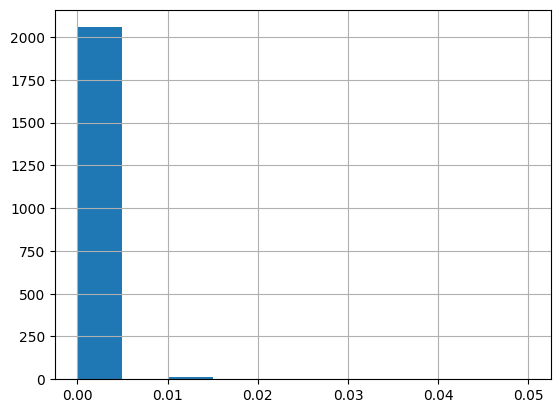

In [11]:
scores_df.page_rank.hist()

In [13]:
scores_df[scores_df.page_rank>0.001]

,_key,page_rank
104,6eeec4b8f6d2ddcfac4d0f6c13f60de9,0.01
532,54b1e8a8922713623c4dc0f3bdbd29b5,0.01
768,66ebf2a3aa71c90b4df3fc93590e22db,0.05
794,2c398f54dacfc67b9fbe414565285dba,0.01
921,4174ce1ae09c87cce8a4accaf940bc58,0.01
971,fa189791c33ccd4f4456a715446d694a,0.01
1021,24c3e29009a0784d1a9a2f49e8b5e326,0.01
1295,ed46d890f9c84ab5a1c90e01a760cfdc,0.01
1401,06072239047275d4512e5ea5f2739620,0.01
1519,94ae60097ba7509ca784c5de117eed38,0.01
